In [57]:
import torch
import numpy as np
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

args = {
    'batch_size': 32,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-6,
    'weight_decay': 1e-4,
    'num_epochs': 30
}

if torch.cuda.is_available():
    args["device"] = torch.device("cuda")
else:
    args["device"] = torch.device("cpu")

print(args["device"])

cuda


In [58]:
train_set = datasets.MNIST(root="./", train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.MNIST(root="./", train=False, download=False, transform=transforms.ToTensor())

print('Amostras de treino:', len(train_set))
print('Amostras de teste:', len(test_set))


Amostras de treino: 60000
Amostras de teste: 10000


In [59]:
print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


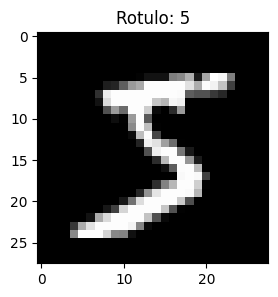

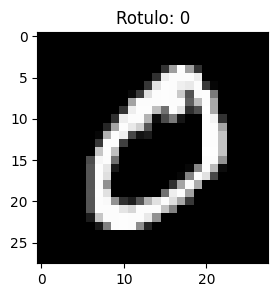

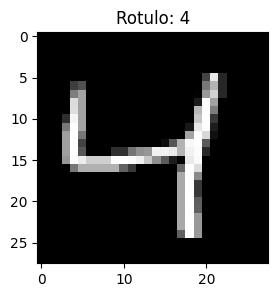

In [60]:
for i in range(3):
    dado, rotulo = train_set[i]
    
    plt.figure(figsize=(3, 3))
    plt.imshow(dado.view(28, 28).numpy(), cmap="gray")
    plt.title(f'Rotulo: {rotulo}')
    plt.show()


In [61]:
train_loader = DataLoader(train_set, 
                          batch_size=args["batch_size"], 
                          shuffle=True,
                          num_workers=args["num_workers"])

test_loader = DataLoader(test_set, 
                         batch_size=args["batch_size"], 
                         shuffle=True,
                         num_workers=args["num_workers"])

print(len(train_loader))
print(len(test_loader))

1875
313


torch.Size([32, 1, 28, 28])
torch.Size([32])


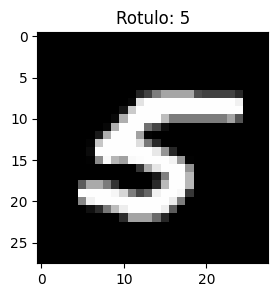

In [62]:
for batch in train_loader:
    dados, rotulos = batch
    print(dados.size())
    print(rotulos.size())

    plt.figure(figsize=(10, 3))
    plt.imshow(dados[0].view(28, 28).numpy(), cmap="gray")
    plt.title(f'Rotulo: {rotulos[0]}')
    plt.show()
    break

In [63]:
class NumberClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size ):
        super(NumberClassifier, self).__init__()
        
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )

        self.output = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()

    def forward(self, x):

        x = x.view(x.size(0), -1)

        feature = self.features(x)
        output = self.output(feature)

        return output

input_size = 28 * 28
hidden_size = 128
output_size = 10

net = NumberClassifier(input_size, hidden_size, output_size).to(args["device"])


Época 1 | Loss média: 2.2552 ± 0.0317
Época 2 | Loss média: 2.1234 ± 0.0510
Época 3 | Loss média: 1.9487 ± 0.0694
Época 4 | Loss média: 1.7542 ± 0.0862
Época 5 | Loss média: 1.5570 ± 0.0955
Época 6 | Loss média: 1.3671 ± 0.1042
Época 7 | Loss média: 1.1924 ± 0.1079
Época 8 | Loss média: 1.0371 ± 0.1119
Época 9 | Loss média: 0.9042 ± 0.1209
Época 10 | Loss média: 0.7941 ± 0.1178
Época 11 | Loss média: 0.7058 ± 0.1244
Época 12 | Loss média: 0.6366 ± 0.1336
Época 13 | Loss média: 0.5838 ± 0.1447
Época 14 | Loss média: 0.5441 ± 0.1553
Época 15 | Loss média: 0.5151 ± 0.1650
Época 16 | Loss média: 0.4942 ± 0.1750
Época 17 | Loss média: 0.4800 ± 0.1941
Época 18 | Loss média: 0.4704 ± 0.2053
Época 19 | Loss média: 0.4650 ± 0.2142
Época 20 | Loss média: 0.4628 ± 0.2331
Época 21 | Loss média: 0.4632 ± 0.2422
Época 22 | Loss média: 0.4663 ± 0.2688
Época 23 | Loss média: 0.4709 ± 0.2726
Época 24 | Loss média: 0.4774 ± 0.2940
Época 25 | Loss média: 0.4849 ± 0.3010
Época 26 | Loss média: 0.4936 ± 0.

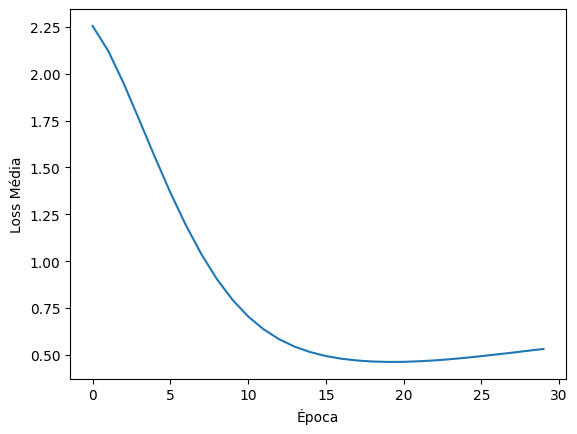

In [64]:
criterion = nn.CrossEntropyLoss().to(args["device"])
optimizer = optim.Adam(net.parameters(), lr=args["lr"], weight_decay=args["weight_decay"])

epoch_losses = []  # para armazenar a média de perda de cada época

for epoch in range(args["num_epochs"]):
    epoch_loss = []  # reiniciar a perda de cada época como lista vazia
    
    for batch in train_loader:
        dados, rotulos = batch

        # Cast na GPU
        dados = dados.to(args["device"])
        rotulos = rotulos.to(args["device"])

        # Forward
        pred = net(dados)
        loss = criterion(pred, rotulos)
        epoch_loss.append(loss.cpu().item())  # usar .item() para pegar o valor escalar da perda

        # Backward
        loss.backward()
        optimizer.step()

    # Cálculo da perda média e desvio padrão da época
    epoch_loss = np.asarray(epoch_loss)
    epoch_mean = epoch_loss.mean()
    epoch_std = epoch_loss.std()
    epoch_losses.append(epoch_mean)  # armazenar apenas a média para plotar depois
    print(f'Época {epoch + 1} | Loss média: {epoch_mean:.4f} ± {epoch_std:.4f}')

# Plotagem da perda média de cada época
plt.plot(epoch_losses)
plt.xlabel('Época')
plt.ylabel('Loss Média')
plt.show()
